In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from sklearn.datasets import load_boston
b = load_boston()
print(b.data.shape)
print(b.DESCR)

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

In [14]:
df=pd.DataFrame(b.data,columns=b.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
df['MValue']=b.target
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
print(df.shape)
x=df.iloc[:,:13]

y=df.iloc[:,13]

(506, 14)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=3)
print((x_test.shape))
print(y_test.shape)

(117, 13)
(117,)


In [18]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print('Training Score:',lr.score(x_train, y_train))
print('Testing Score:',lr.score(x_test, y_test))

Training Score: 0.7276365138433908
Testing Score: 0.7700077232446304


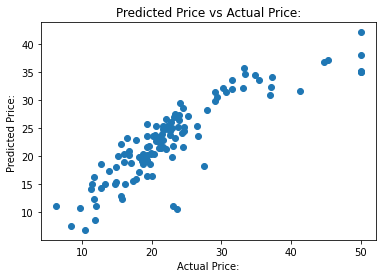

In [19]:
#RIDGE REGRESSION
from sklearn.linear_model import Ridge
rr = Ridge(alpha=3)
rr.fit(x_train,y_train)
y_pred = rr.predict(x_test) 
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price:")
plt.ylabel("Predicted Price: ")
plt.title("Predicted Price vs Actual Price:")
plt.show()

In [20]:
print('Training Score:',rr.score(x_train, y_train))
print('Testing Score:',rr.score(x_test, y_test))

Training Score: 0.7231202783113384
Testing Score: 0.7575141145900715


In [21]:
#LASSO REGRESSION
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.1)
ls.fit(x_train, y_train)
print(ls.score(x_train,y_train))
print(ls.score(x_test, y_test))

0.7169713525740222
0.7504035217541559


In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

Mean Squared Error:  20.24087273478795


In [25]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_enc = lab_enc.fit_transform(y_train)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train_enc)

KNeighborsClassifier(n_neighbors=2)

In [27]:
y_pred = knn.predict(x_test)
print("KNN score:",knn.score(x_train,y_train_enc))

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test,y_pred)
print(score)
mean_sqerr = mean_squared_error(y_test,y_pred)
print(mean_sqerr)

KNN score: 0.4987146529562982
-68.6354748326382
5812.638461538461


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear')
clf.fit(x_train,y_train_enc)
y_pred = clf.predict(x_test)
score = r2_score(y_test,y_pred)
print(score)

-90.47941798341043


In [29]:
print(clf.score(x_train,y_train_enc))

0.987146529562982
